# 1. Predicting Rarity With Just Card Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.tools as sm



%matplotlib inline

In [14]:
df = pd.read_csv('dummies_df_card_list.csv')

In [15]:
df.head()

,attack,cardId,cost,durability,health,name,rarity,text,armor,mech_Adapt,...,race_Elemental.1,race_General.1,race_Mech.1,race_Murloc.1,race_Pirate.1,race_Totem.1,type_Hero.1,type_Minion.1,type_Spell.1,type_Weapon.1
0,-1.0,CS2_041,0.0,-1.0,-1.0,Ancestral Healing,0,Restore a minion\nto full Health and\ngive it ...,-1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,-1.0,CS2_072,0.0,-1.0,-1.0,Backstab,0,Deal $2 damage to an undamaged minion.,-1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,-1.0,EX1_169,0.0,-1.0,-1.0,Innervate,0,Gain 1 Mana Crystal this turn only.,-1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,-1.0,CS2_008,0.0,-1.0,-1.0,Moonfire,0,Deal $1 damage.,-1.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,-1.0,NEW1_003,0.0,-1.0,-1.0,Sacrificial Pact,0,Destroy a Demon. Restore #5 Health to your hero.,-1.0,0.0,...,0,1,0,0,0,0,0,0,1,0


## Linear Regression Model

Linear Regression on raw data:

In [22]:
numerical_columns = df._get_numeric_data().columns
features = [c for c in numerical_columns if c != 'rarity']
X = df[features]
y = df['rarity']

X = sm.add_constant(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [24]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)

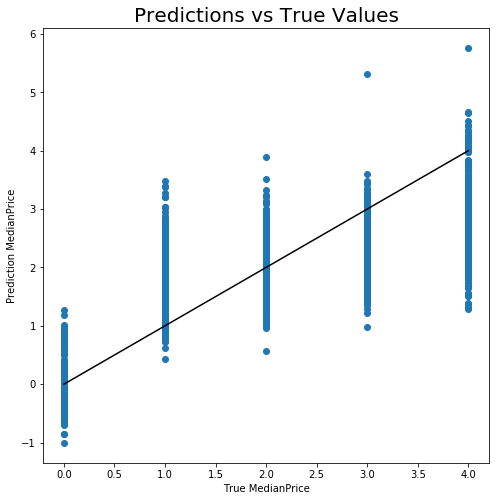

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(y =  model.predict(X), x = y)
plt.title('Predictions vs True Values', fontsize = 20)
plt.xlabel('True MedianPrice')
plt.ylabel('Prediction MedianPrice')
plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k');#

In [ ]:
model.

Linear Regression on Transformed Data:

In [ ]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [1]:
import pandas as pd

In [5]:
df_deck_archetypes = pd.read_csv('decklist_df.csv')

In [6]:
df_deck_archetypes.head()

,big_shaman,big_warrior,bomb_warrior,burn_mage,control_paladin,control_warrior,deathrattle_hunter,handlock,khadgar_mage,mech_hunter,...,murloc_shaman,resurrect_priest,secret_hunter,shudderwock_shaman,silence_priest,spell_hunter,tempo_rogue,thief_rogue,token_druid,zoo_warlock
0,Ancestral Healing,Shield Slam,Eternium Rover,Elemental Evocation,Desperate Measures,Eternium Rover,Springpaw,Mortal Coil,Acidic Swamp Ooze,Mecharoo,...,Grimscale Oracle,Forbidden Words,Secretkeeper,Ancestral Healing,Circle of Healing,Arcane Shot,Backstab,Backstab,Acornbearer,Abusive Sergeant
1,Ancestral Healing,Shield Slam,Eternium Rover,Elemental Evocation,Desperate Measures,Eternium Rover,Springpaw,Mortal Coil,Acidic Swamp Ooze,Mecharoo,...,Grimscale Oracle,Forbidden Words,Secretkeeper,Ancestral Healing,Circle of Healing,Arcane Shot,Backstab,Backstab,Acornbearer,Abusive Sergeant
2,Earth Shock,Whirlwind,Omega Assembly,Magic Trick,Redemption,Omega Assembly,Tracking,Acidic Swamp Ooze,Book of Specters,Acidic Swamp Ooze,...,Murloc Raider,Topsy Turvy,Explosive Trap,Earth Shock,Silence,Rapid Fire,Preparation,Preparation,Crystalsong Portal,Argent Squire
3,Earth Shock,Execute,Omega Assembly,Magic Trick,Redemption,Omega Assembly,Acidic Swamp Ooze,Doomsayer,Book of Specters,Bomb Toss,...,Murloc Raider,Inner Fire,Explosive Trap,Acidic Swamp Ooze,Silence,Rapid Fire,Preparation,Preparation,Crystalsong Portal,Argent Squire
4,Ancestral Spirit,Execute,Shield Slam,Mirror Image,Flash of Light,Shield Slam,Fireworks Tech,Doomsayer,Firetree Witchdoctor,Bomb Toss,...,Murloc Tidecaller,Inner Fire,Freezing Trap,Acidic Swamp Ooze,Inner Fire,Secret Plan,Shadowstep,Argent Squire,Dreamway Guardians,Crystallizer


In [10]:
df_deck_archetypes.stack().value_counts()

Zilliax                 15
Unleash the Hounds       9
Acidic Swamp Ooze        8
Animal Companion         8
Mountain Giant           8
Unleash the Beast        7
Marked Shot              6
Warpath                  6
Brawl                    6
Twilight Drake           6
Preparation              6
Shield Slam              6
Backstab                 6
Dire Wolf Alpha          6
Shield Block             6
Kill Command             6
Witchwood Grizzly        5
SI:7 Agent               4
Shadowstep               4
Omega Assembly           4
Power Word: Shield       4
Springpaw                4
Ancestral Healing        4
Wargear                  4
Lifedrinker              4
Walking Fountain         4
Hench-Clan Burglar       4
Tracking                 4
Ursatron                 4
Headhunter's Hatchet     4
                        ..
Sense Demons             1
Malygos                  1
Keeper Stalladris        1
Lightforged Blessing     1
Toxfin                   1
Boommaster Flark         1
H

So of our 23 decks, each containing 30 cards, we have 283 unique cards. 

Normalize this! We need to definitely normalize using the CLASS of each card, and the following:

1 Archetypes of Druid: ['Token Druid']   
5 Archetypes of Hunter: ['Deathrattle Hunter' 'Mech Hunter' 'Midrange Hunter' 'Secret Hunter' 'Spell Hunter']   
2 Archetypes of Mage: ['Burn Mage' 'Khadgar Mage']   
3 Archetypes of Paladin: ['Control Paladin' 'Mech Paladin' 'Secret Paladin']   
2 Archetypes of Priest: ['Resurrect Priest' 'Silence Priest']   
3 Archetypes of Rogue: ['Miracle Rogue' 'Tempo Rogue' 'Thief Rogue']   
3 Archetypes of Shaman: ['Big Shaman' 'Murloc Shaman' 'Shudderwock Shaman']   
2 Archetypes of Warlock: ['Handlock' 'Zoo Warlock']   
4 Archetypes of Warrior: ['Big Warrior' 'Bomb Warrior' 'Control Warrior' 'Dragon Warrior']   


In [ ]:
# sudo code
df_deck_name_here = pd.DataFrame
   columns = card_name, everything else from the card set dataframe.
  

# Predict Rarity with Deck Win Data